# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


# 1. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.




In [3]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

def train_pred_logistic_regression(X, Y, neta, init_alpha_value, kernel='linear', reg_param=0., 
                                   kernel_param=1., num_iter_gd=100):
    
    ##took neta and initial alpha also as argument 
   
    n=len(Y)
    
    
    K_matrix=np.zeros((n,n))
                      
    if kernel=='linear':
        for i in range(n):
            for j in range(n):
                K_matrix[i,j]=(X[i].dot(X[j]))
                
    elif kernel=='poly':
        for i in range(n):
            for j in range(n):
                K_matrix[i,j] = (1+X[i].dot(X[j]))**(kernel_param)
            
    elif kernel=='rbf':
        for i in range(n):
            for j in range(n):
                K_matrix[i,j] = np.exp(-(kernel_param)*(np.linalg.norm(X[i]-X[j])**2))
    
    
    ##after trying different learning rates setting for them is
    
    
    
    
    t = [init_alpha_value]*len(X)
    alpha=np.array(t)
    for itr in range(num_iter_gd):
        total=np.zeros(len(X))
        
        for i in range(len(X)):
            to_add=(1/(1+(np.exp(Y[i]*(alpha.dot(K_matrix[:,i]))))))*(-Y[i]*K_matrix[:,i])
            total+=to_add
                    
        grad_R=(total+reg_param*(K_matrix.dot(alpha)))/n
        
        alpha=alpha-neta*grad_R
        
    return alpha


def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    """
    Return the predictions on test_X using the learnt alphas
    """
    
    n=len(train_Y)
     
    p=len(test_X)
    
    K_matrix=np.zeros((n,p))
                      
    if kernel=='linear':
        for i in range(n):
            for j in range(p):
                K_matrix[i,j]=(train_X[i].dot(test_X[j]))
                
    elif kernel=='poly':
        for i in range(n):
            for j in range(p):
                K_matrix[i,j] = (1+train_X[i].dot(test_X[j]))**(kernel_param)
            
    elif kernel=='rbf':
        for i in range(n):
            for j in range(p):
                K_matrix[i,j] = np.exp(-(kernel_param)*(np.linalg.norm(train_X[i]-test_X[j])**2))
    
        
    pred_test_Y=np.array([])
    
    i=-1
    for data_point in test_X:
        i+=1
        probab_class_1=1/(1+np.exp(-alpha.dot(K_matrix[:,i])))
        if probab_class_1>=.5:
            
            pred_test_Y=np.append(pred_test_Y,[1])
        else:
            pred_test_Y=np.append(pred_test_Y,[-1])
    
    
    return pred_test_Y


In [6]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below. 

def get_best_hyper(X,Y, test_X, test_Y, neta_lin,neta_poly,neta_rbf,alpha_val):
    
    
    #X and Y is full set(for train and validation)
    till=int(.7*len(X))
    train_X=X[:till]
    train_Y=Y[:till]
    
    #30%of all will be validation set
    valid_X=X[till:]
    valid_Y=Y[till:]
    
    
    ######################
    kernel='linear'

    reg_opt=[1e-3,1e-2,1e-1,1,1e1,1e2,1e3]
    lin_acc=np.zeros(len(reg_opt))
                     
    
    i=-1
    for reg_params in reg_opt:
        i+=1
        alpha = train_pred_logistic_regression(train_X, train_Y, neta_lin, alpha_val, 
                                               kernel, reg_params, kernel_param=1, num_iter_gd=100)
        valid_Y_pred = test_pred(alpha, train_X, train_Y, valid_X, kernel, kernel_param=1)
        lin_acc[i] = np.sum(valid_Y==valid_Y_pred)

    arg_max = np.argwhere(lin_acc==np.max(lin_acc))[0]

    best_reg_param = reg_opt[arg_max[0]]
    
    
    ##getting training and test error
    best_alpha = train_pred_logistic_regression(X, Y, neta_lin, alpha_val, kernel, reg_param=best_reg_param, 
                                       kernel_param=1, num_iter_gd=100)
    train_Y_pred = test_pred(best_alpha, X, Y, X, kernel, kernel_param=1)
    test_Y_pred = test_pred(best_alpha, X, Y, test_X, kernel, kernel_param=1)
    
    train_err = np.sum(train_Y_pred!=Y)/len(Y)*100
    test_err = np.sum(test_Y_pred!=test_Y)/len(test_Y)*100
    
    ###########################
    kernel='poly'
    
    i=-1

    reg_opt    = [1e-3,1e-2,1e-1,1,1e1,1e2,1e3]
    kernel_opt = [1,2,3,4,5,6]
    poly_acc=np.zeros((len(reg_opt),len(kernel_opt)))
    
    for reg_params in reg_opt:
        i+=1
        j=-1
        for kernel_params in kernel_opt:
            j+=1
            alpha = train_pred_logistic_regression(train_X, train_Y, neta_poly, alpha_val, kernel, reg_params, 
                                       kernel_params,num_iter_gd=100)
            valid_Y_pred = test_pred(alpha, train_X, train_Y, valid_X, kernel, kernel_params)
            poly_acc[i,j] = np.sum(valid_Y==valid_Y_pred)

    argmax_acc = np.argwhere(poly_acc==np.max(poly_acc))[0]

    best_reg_param = reg_opt[argmax_acc[0]]
    best_kernel_param = kernel_opt[argmax_acc[1]]

    best_poly_param = (best_reg_param,best_kernel_param)

    
    
    ##getting training and test error
    best_alpha = train_pred_logistic_regression(X, Y, neta_poly, alpha_val, kernel, reg_param=best_reg_param, 
                                       kernel_param=best_kernel_param, num_iter_gd=100)
    train_Y_pred = test_pred(best_alpha, X, Y, X, kernel, kernel_param=best_kernel_param)
    test_Y_pred = test_pred(best_alpha, X, Y, test_X, kernel, kernel_param=best_kernel_param)
    
    train_err = np.sum(train_Y_pred!=Y)/len(Y)*100
    test_err = np.sum(test_Y_pred!=test_Y)/len(test_Y)*100
    
    ####################


    kernel='rbf'
    
    i=-1

    reg_opt = [1e-3,1e-2,1e-1,1,1e1]  ##final, dont change this
    kernel_opt = [1e-4,1e-3,1e-2,1e-1,2,1e1,1e2] ##small gammas will work for dataset C
                                            ##cause input to exp(-) with high gammas gives 0 
                                             ##and K_matrix comes out to be diagonal
    rbf_acc = np.zeros((len(reg_opt),len(kernel_opt)))
    
    for reg_params in reg_opt:
        i+=1
        j=-1
        for kernel_params in kernel_opt:
            j+=1
            alpha = train_pred_logistic_regression(train_X, train_Y, neta_rbf, alpha_val, kernel, reg_params, 
                                       kernel_params, num_iter_gd=100)
            
            valid_Y_pred = test_pred(alpha, train_X, train_Y, valid_X, kernel, kernel_params)
            
            rbf_acc[i,j] = np.sum(valid_Y==valid_Y_pred)
    
    argmax_acc = np.argwhere(rbf_acc==np.max(rbf_acc))[0]

    best_reg_param    = reg_opt[argmax_acc[0]]
    best_kernel_param = kernel_opt[argmax_acc[1]]

    rbf_best_hyp = (best_reg_param,best_kernel_param)
    
    
    ##getting training and test error
    best_alpha = train_pred_logistic_regression(X, Y, neta_rbf, alpha_val, kernel, reg_param=best_reg_param, 
                                       kernel_param=best_kernel_param, num_iter_gd=100)
    
    train_Y_pred = test_pred(best_alpha, X, Y, X, kernel, kernel_param=best_kernel_param)
    test_Y_pred = test_pred(best_alpha, X, Y, test_X, kernel, kernel_param=best_kernel_param)
    
    train_err = np.sum(train_Y_pred!=Y)/len(Y)*100
    test_err = np.sum(test_Y_pred!=test_Y)/len(test_Y)*100
    
    return best_reg_param,best_poly_param,rbf_best_hyp

for name in ['A','B','C','D']:
    
    data=np.load('dataset_'+name+'.npz')
    lis=data.files


    X=data[lis[0]]
    Y=data[lis[1]]
    test_X = data[lis[2]]
    test_Y = data[lis[3]]
    
    
    if name=='A' or name=='B':
        neta_lin = 1e-2
        neta_poly = 1e-5 
        neta_rbf = 1e-1
        alpha_values = 0
    
    elif name=='D':
        ##this dataset needs to be shuffled
        ##to concatenate
        Y = np.reshape(Y,(-1,1))
        D = np.concatenate((X,Y),axis=1)
        D = np.random.permutation(D)
        X = D[:,:-1]
        Y = D[:,-1]
        neta_lin = 1e-9
        neta_poly = 1e-21
        neta_rbf = 1e1
        alpha_values = 1
        
    
    elif name=='C':
        neta_lin = 1e-9
        neta_poly = 1e-23
        neta_rbf = 1 
        alpha_values = 0
    get_best_hyper(X,Y,test_X, test_Y, neta_lin,neta_poly,neta_rbf, alpha_values)

        


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in exp
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: overflow encountered in exp
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in subtract
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in multiply


TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

<b>Observations</b><br><br>
<b>dataset_A</b><br>
-From plots we can abserve the data is not <b>lineraly seperable</b> and hence linear kernel does not perform well and gives 15% error on test data.<br> 
-We expect poly and rbf to perform well but only rbf being exponential kernel gives test error of <b>0.2%</b> whereas poly gives test error of <b>18.2%</b>.<br>
-reason for poly kernel giving large error can be
- for chosen learning rate for poly kernel, alphas are not converging in 100 iteration   

&emsp;<b>Best parameters and errors </b><br>


|   kernel     | reg_param | kernel_param | train error(in %) | test error(in %) |
|--------|-----------|--------------|-------------------|------------------|
| linear | 0.001     | -            | 13                | 15               |
| poly   | 1000      | 4            | 14.333            | 18.2             |
| rbf    | 0.001     | 100          | 0                 | 0.4              |              |

<b>dataset_B</b><br>
-all kernels performs almost equally 

|   kernel     | reg_param | kernel_param | train error(in %) | test error(in %) |
|--------|-----------|--------------|-------------------|------------------|
| linear | 100       | -            | 17.667            | 19.8             |
| poly   | 0.001     | 6            | 17.533            | 19.6             |
| rbf    | 10        | 2            | 20.267            | 23.8             |

<b>dataset_C</b><br>
-even if we can't visualise the dataset we can see that test error for linear kernel is very large and hence it is sure that data has complex variation   

|  kernel      | reg_param | kernel_param | train error(in %) | test error(in %) |
|--------|-----------|--------------|-------------------|------------------|
| linear | 0.001     | -            | 36.8              | 35.017           |
| poly   | 0.001     | 6            | 3.467             | 6.397            |
| rbf    | 0.001     | 0.01         | 0                 | 3.03             |

<b>dataset_D</b><br>
-the dataset is well classified by a linear kernel than other kernels.  

|     kernel   | reg_param | kernel_param | train error(in %) | test error(in %) |
|--------|-----------|--------------|-------------------|------------------|
| linear | 100       | -            | 10.75             | 7.101            |
| poly   | 0.01      | 3            | 11.25             | 20.71            |
| rbf    | 0.001     | 0.0001       | 7.25              | 15.385           |

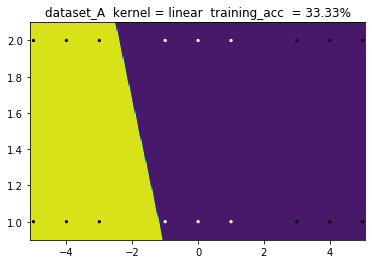

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in exp
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in multiply


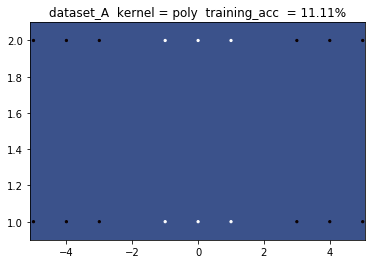

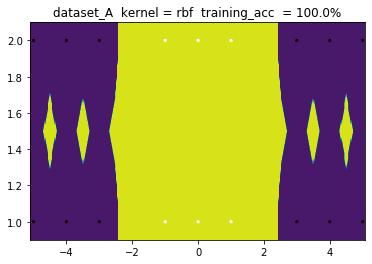

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: overflow encountered in exp


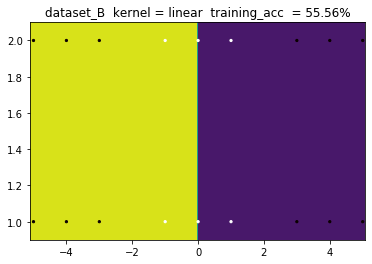

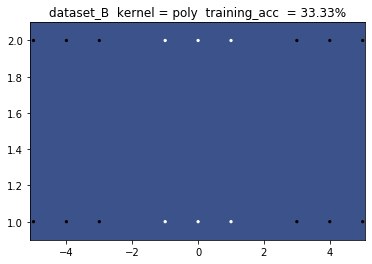

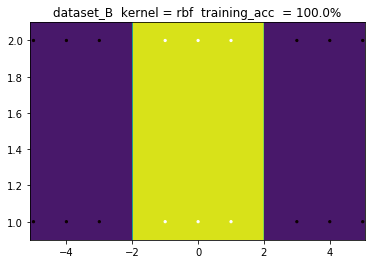

In [5]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
for name in ['A','B']:
    data=np.load('dataset_'+name+'.npz')
    lis=data.files


    train_X=np.array([[-5,1],[-5,2],[-4,1],[-4,2],[-3,1],[-3,2],
     [-1,1],[-1,2],[0,1],[0,2],[1,1],[1,2],
     [3,1],[3,2],[4,1],[4,2],[5,1],[5,2]
    ])
    train_Y=np.array([-1,-1,-1,-1,-1,-1,1, 1,1, 1,1, 1,-1,-1,-1,-1,-1,-1])


#     X = np.array([[-5,1],[-5,2],[-4,1],[-4,2],[-3,1],[-3,2],
#      [-1,1],[-1,2],[0,1],[0,2],[1,1],[1,2],
#      [3,1],[3,2],[4,1],[4,2],[5,1],[5,2]
#     ])
# y = np.array([0,0,0,0,0,0,1, 1,1, 1,1, 1,2,2,2,2,2,2])

    x_min = min(train_X[:,0])
    x_max = max(train_X[:,0])
    y_min = min(train_X[:,1])
    y_max = max(train_X[:,1])

    X = np.arange(x_min-.1,x_max+.1,0.03) ##change it to .02/.01 while submitting
    Y = np.arange(y_min-.1,y_max+.1,0.03)
    X_inst,Y_inst = np.meshgrid(X,Y)

    x1 = X_inst.reshape((-1,1))
    x2 = Y_inst.reshape((-1,1))
    D_inst  = np.concatenate((x1,x2),axis=1)

    for kernel in ['linear','poly','rbf']:
        ##discoverd netas
        neta_lin = 1e-2
        neta_poly = 1e-5
        neta_rbf = 1e-1

        if name=='A':    
            if kernel=='linear':
                neta = neta_lin
                reg_param = 0.001
                kernel_param=1

            elif kernel=='poly':
                neta = neta_poly
                reg_param = 1000
                kernel_param = 4

            elif kernel=='rbf':
                neta = neta_rbf
                reg_param = 0.001
                kernel_param = 100
        if name=='B':  
            if kernel=='linear':
                neta = neta_lin
                reg_param = 100
                kernel_param=1

            elif kernel=='poly':
                neta = neta_poly
                reg_param = 0.01
                kernel_param = 6

            elif kernel=='rbf':
                neta = neta_rbf
                reg_param = 10
                kernel_param = 2
    
        initial_alpha=0
        alpha = train_pred_logistic_regression(train_X, train_Y, neta, initial_alpha, kernel, reg_param, 
                                           kernel_param, num_iter_gd=100)
        
        pred_train_Y = test_pred(alpha, train_X, train_Y, train_X, kernel, kernel_param)
        acc=np.sum(pred_train_Y==train_Y)/len(train_Y)
        
        Z = test_pred(alpha, train_X, train_Y, D_inst, kernel, kernel_param)
        Z_inst = Z.reshape(X_inst.shape)
        plt.figure()
        plt.contourf(X_inst,Y_inst,Z_inst)
        plt.scatter(train_X[:,0],train_X[:,1], s=5, c=train_Y, marker='o', cmap='hot')
        plt.title('dataset_'+name+'  '+'kernel = '+kernel+'  training_acc  = '+str(round(acc*100,2))+'%')
        plt.show()

# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [8]:
# CodeWrite cell
# Write SVM classifier using SKlearn
# write only functions here
def train_svm(X, Y, kernel, kernel_param, C):
    classif_algo=SVC(C=C,kernel=kernel,degree=kernel_param,gamma=kernel_param)
    classifier=classif_algo.fit(X,Y)
    return classifier

In [9]:
# CodeWrite cell
# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set. 
# Also for generating the numbers that you report below.

for name in ['A','B','C','D']:
    #getting data from npz file
    data=np.load('dataset_'+name+'.npz')
    lis=data.files
    X=data[lis[0]]
    Y=data[lis[1]]
    test_X = data[lis[2]]
    test_Y = data[lis[3]]

    till=int(.7*len(X))
    train_X=X[:till]
    train_Y=Y[:till]
    valid_X=X[till:]
    valid_Y=Y[till:]
    
    

    ##training and validating
    
    ##LINEAR
    C_opt=[1e-3,1e-2,1e-1,1,1e1,1e2,1e3]
    acc=np.zeros(len(C_opt))
    i=-1
    for C in C_opt:
        i+=1
        pred_valid_Y=train_svm(train_X, train_Y, 'linear', 1, C).predict(valid_X)
        acc[i]=np.sum(pred_valid_Y==valid_Y)
    best_lin_param = C_opt[np.argmax(acc)]    
    
              ##train and test error
        
    best_classifier = train_svm(X, Y, 'linear', 1, best_lin_param)
    pred_Y = best_classifier.predict(X)
    pred_test_Y = best_classifier.predict(test_X)
    
    train_err = np.sum(Y!=pred_Y)/len(Y)*100
    test_err = np.sum(test_Y!=pred_test_Y)/len(test_Y)*100
    
    ##POLY
    C_opt=[1e-3,1e-2,1e-1,1,1e1]
    k_opt=[1,2,3,4,5,6]
    acc=np.zeros((len(C_opt),len(k_opt)))
    i=-1
    for C in C_opt:
        i+=1
        j=-1
        for k_par in k_opt:
            j+=1
            pred_valid_Y=train_svm(train_X, train_Y, 'poly', k_par, C).predict(valid_X)
            acc[i,j]=np.sum(pred_valid_Y==valid_Y)
    arg = np.argwhere(acc==np.max(acc))[0]
    best_C = C_opt[arg[0]]
    best_k = k_opt[arg[1]]
    best_poly_param = (best_k,best_C)
    
            ##train and test error
        
    best_classifier = train_svm(X, Y, 'poly', best_k, best_C)
    pred_Y = best_classifier.predict(X)
    pred_test_Y = best_classifier.predict(test_X)
    
    train_err = np.sum(Y!=pred_Y)/len(Y)*100
    test_err = np.sum(test_Y!=pred_test_Y)/len(test_Y)*100
    
    
    ##rbf
    C_opt=[1e-3,1e-2,1e-1,1,1e1,1e2,1e3]
    k_opt=[1e-4,1e-3,1e-2,.1,1,1e1,1e2]
    acc=np.zeros((len(C_opt),len(k_opt)))
    i=-1
    for C in C_opt:
        i+=1
        j=-1
        for k_par in k_opt:
            j+=1
            pred_valid_Y=train_svm(train_X, train_Y, 'rbf', k_par, C).predict(valid_X)
            acc[i,j]=np.sum(pred_valid_Y==valid_Y)
    arg=np.argwhere(acc==np.max(acc))[0]
    best_C=C_opt[arg[0]]
    best_k=k_opt[arg[1]]
    best_rbf_param=(best_k,best_C)
    
            ##train and test error
        
    best_classifier = train_svm(X, Y, 'rbf', best_k, best_C)
    pred_Y = best_classifier.predict(X)
    pred_test_Y = best_classifier.predict(test_X)
    
    train_err = np.sum(Y!=pred_Y)/len(Y)*100
    test_err = np.sum(test_Y!=pred_test_Y)/len(test_Y)*100
    


TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

The <b>Observations</b> are very much similar to logistic regression case<br>
<b>dataset_A</b>


|        | reg_param | kernel_param | train error(in %) | test error(in %) |
|--------|-----------|--------------|-------------------|------------------|
| linear | 1         | -            | 12.867            | 13.4             |
| poly   | 0.1       | 3            | 6.067             | 8.2              |
| rbf    | 0.1       | 10           | 0.133             | 0.2              |

<b>dataset_B</b>

|        | reg_param | kernel_param | train error(in %) | test error(in %) |
|--------|-----------|--------------|-------------------|------------------|
| linear | 1         | -            | 17.8              | 20.6             |
| poly   | 1         | 1            | 17.8              | 20.6             |
| rbf    | 0.1       | 1            | 17.533            | 20.2             |

<b>dataset_C</b>

|        | reg_param | kernel_param | train error(in %) | test error(in %) |
|--------|-----------|--------------|-------------------|------------------|
| linear | 0.001     | -            | 7.267             | 9.764            |
| poly   | 0.001     | 5            | 0                 | 3.704             |
| rbf    | 1         | 0.001        | 0                 | 2.357            |

<b>dataset_D</b>

|        | reg_param | kernel_param | train error(in %) | test error(in %) |
|--------|-----------|--------------|-------------------|------------------|
| linear | 1         | -            | 2.75              | 5.325            |
| poly   | 1         | 1            | 2.75              | 5.325            |
| rbf    | 10        | 0.0001       | 2.75              | 7.101            |

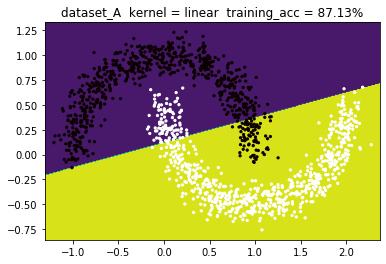

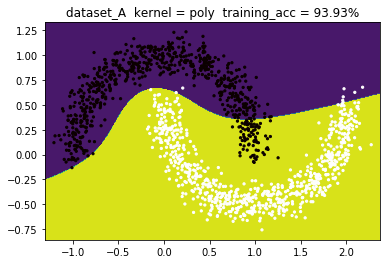

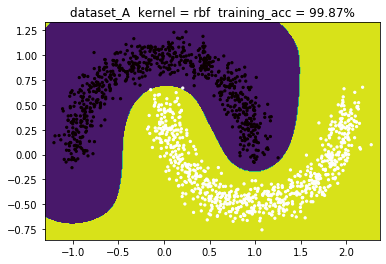

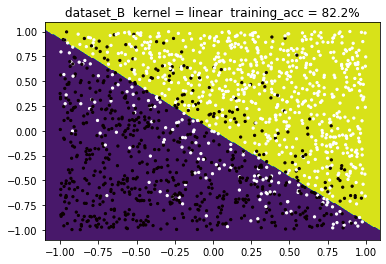

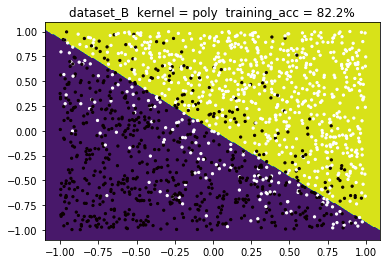

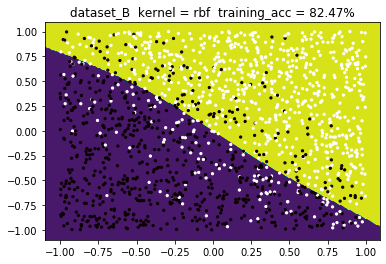

In [10]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6


for name in ['A','B']:
    data=np.load('dataset_'+name+'.npz')
    lis=data.files


    train_X=data[lis[0]]
    train_Y=data[lis[1]]

    x_min = min(train_X[:,0])
    x_max = max(train_X[:,0])
    y_min = min(train_X[:,1])
    y_max = max(train_X[:,1])

    X = np.arange(x_min-.1,x_max+.1,0.01) ##change it to .02/.01 while submitting
    Y = np.arange(y_min-.1,y_max+.1,0.01)
    X_inst,Y_inst = np.meshgrid(X,Y)

    x1 = X_inst.reshape((-1,1))
    x2 = Y_inst.reshape((-1,1))
    D_inst  = np.concatenate((x1,x2),axis=1)

    for kernel in ['linear','poly','rbf']:
        
        if name=='A':    
            if kernel=='linear':
                C = 1
                kernel_param = 1

            elif kernel=='poly':
                C = 0.1
                kernel_param = 3

            elif kernel=='rbf':
                C = 0.1
                kernel_param = 10
        elif name=='B':  
            if kernel=='linear':
                C = 1
                kernel_param = 1

            elif kernel=='poly':
                C = 1 
                kernel_param = 1 

            elif kernel=='rbf':
                C = 0.1
                kernel_param = 1
        classifier = train_svm(train_X, train_Y, kernel, kernel_param, C)        
        
        Z = classifier.predict(D_inst)
        Z_inst = Z.reshape(X_inst.shape)
        
        pred_train_Y = classifier.predict(train_X)
        acc = np.sum(pred_train_Y==train_Y)/len(train_Y)
        
        plt.figure()
        plt.contourf(X_inst,Y_inst,Z_inst)
        plt.scatter(train_X[:,0],train_X[:,1], s=5, c=train_Y, marker='o', cmap='hot')
        plt.title('dataset_'+name+'  '+'kernel = '+kernel+'  training_acc = '+str(round(acc*100,2))+'%')
        plt.show()

# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [11]:
# CodeWrite cell
# Write Decision tree classifier from scratch, 
# write only functions here (you may write extra functions here if you wish)

def train_decision_tree(X, Y, index, num_nodes_stop=1, criterion='accuracy' ):
    """ Returns a decision tree trained on X and Y. 
Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
Split criterion can be either 'accuracy' or 'entropy'.
Returns a tree (In whatever format that you find appropriate)
    """    
    global tree
    if len(X)<=num_nodes_stop:
        if np.sum(Y)>=0:
            tree = tree+[tuple((index, 0, 0, 1))]
        else:
            tree = tree+[tuple((index, 0, 0, -1))]
        return
    if np.all(Y==1) or np.all(Y==-1):
        tree = tree+[tuple((index, 0, 0, Y[0]))]
        return
    
    
    
    i=-1
    acc_att = np.zeros(X.shape[1])
    best_thr_holds = np.zeros(X.shape[1])
            
    for att in range(X.shape[1]):
        i+=1
        
        thr = np.unique(X[:,i])
        thr_holds = []
        
        if len(thr)==1:
            if criterion=='entropy':
                acc_att[i]= -float('inf')
            continue
        else:
            for p in np.arange(0,len(thr)):
                if p+1<len(thr):
                    thr_holds.append((thr[p]+thr[p+1])/2)
        thr_holds = np.array(thr_holds)
        acc_thr = np.zeros(len(thr_holds))
        
        if criterion=='accuracy':
            j=-1
            for thr_hold in thr_holds:
                j+=1
                pred_Y = np.ones(len(Y))
                pred_Y[X[:,i]<thr_hold]=-1
                acc_thr[j] = np.sum(pred_Y==Y)/len(Y)
                if acc_thr[j]<0.5:
                    acc_thr[j]=1-acc_thr[j]
        elif criterion=='entropy':
            j=-1
            for thr_hold in thr_holds:
                j+=1
                left_Y = Y[X[:,i]<thr_hold]
                right_Y = Y[X[:,i]>thr_hold]
                left_n = len(left_Y)
                right_n = len(right_Y)
                
                
                left_pos = np.sum(left_Y==1)
                left_neg = left_n - left_pos
                right_pos = np.sum(right_Y==1)
                right_neg = right_n - right_pos
                
                if left_pos==0 or left_neg==0:
                    left_ent=0
                else:
                    left_ent = -(left_pos/left_n)*np.log2(left_pos/left_n)-(left_neg/left_n)*np.log2(left_neg/left_n)
                if right_pos==0 or right_neg==0:
                    right_ent=0
                else:
                    right_ent = -(right_pos/right_n)*np.log2(right_pos/right_n)-(right_neg/right_n)*np.log2(right_neg/right_n)
                avg_ent = left_n*left_ent+right_n*right_ent
                acc_thr[j] = -avg_ent
        best_thr_holds[i] = thr_holds[acc_thr==np.max(acc_thr)][0]
        acc_att[i] = np.max(acc_thr)
        
    att = np.argmax(acc_att)   
    thr_hold = best_thr_holds[att]
    
    tree = tree+[tuple((index, att, thr_hold,0))]
    
    
    
    
    
    left_part, right_part = (train_decision_tree(X[X[:,att]<thr_hold], Y[X[:,att]<thr_hold], 2*index+1, 
                                                  num_nodes_stop, criterion ),
                              train_decision_tree(X[X[:,att]>thr_hold], Y[X[:,att]>thr_hold], 2*index+2, 
                                                  num_nodes_stop, criterion))
    
    
    return tree
    
def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances. """
    m = len(test_X)
    pred_test_Y=np.zeros(m)
    
    for i in range(m):
        t = test_X[i]
        
        index = 0
        
        j=0
        while j<len(tree):
            if index==tree[j][0]: 
                if tree[j][3]!=0:
                    pred_test_Y[i]=tree[j][3]
                else:
                    att = tree[j][1]
                    thr_hold = tree[j][2]
                    if t[att]<thr_hold:
                        index = 2*index+1
                    else:
                        index = 2*index+2
            j+=1
    
    return pred_test_Y





In [12]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.
for name in ['A','B','C','D']:
    #getting data from npz file
    data=np.load('dataset_'+name+'.npz')
    lis=data.files
    X=data[lis[0]]
    Y=data[lis[1]]
    test_X = data[lis[2]]
    test_Y = data[lis[3]]

    till=int(.7*len(X))
    train_X=X[:till]
    train_Y=Y[:till]
    valid_X=X[till:]
    valid_Y=Y[till:]
    
    
    num_opt = np.array([1,2,4,8,11,15,20,25,30,36,40]) 
    
    acc = np.zeros(len(num_opt))
    for criterion in ['accuracy','entropy']:
        i=-1
        for num_nodes_stop in num_opt:
            i+=1
            tree=[]
            tree = train_decision_tree(train_X, train_Y,0 , num_nodes_stop, criterion)
            pred_valid_Y = eval_decision_tree(tree, valid_X)
            acc[i] = np.sum(pred_valid_Y==valid_Y)

        acc_max = np.max(acc)
        best_num = num_opt[np.argwhere(acc==acc_max)][0][0]
        
        ##training and test error
        tree = []
        tree = train_decision_tree(X, Y,0 , best_num, criterion)
        pred_train_Y = eval_decision_tree(tree, X)
        train_err = 100 - np.sum(pred_train_Y==Y)/len(Y)*100

        pred_test_Y = eval_decision_tree(tree, test_X)
        test_err = 100 - np.sum(pred_test_Y==test_Y)/len(test_Y)*100

        

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

<b>dataset_A</b><br>
-best_num_nodes=1 implies that training and validation data are almost same. And even test error is less also which also implies that test data is very much like training data<br>
-as best_num_nodes=1, it gives zero training error. 

|criterion          |      best   num_nodes_stop |  train error    (in %) |  test error    (in %) |
|----------|----------------------------|------------------------|-----------------------|
| accuracy | 1                          | 0                      | 6                     |
| entropy  | 1                          | 0                      | 0.6                   |

<b>dataset_B</b><br>
-if num_nodes_stop is taken to be one, it overfits and gives very large test_error  

|     criterion     |      best   num_nodes_stop |  train error    (in %) |  test error    (in %) |
|----------|----------------------------|------------------------|-----------------------|
| accuracy | 36                         | 15.667                 | 26.2                  |
| entropy  | 25                         | 10                     | 23.6                  |

<b>dataset_C</b>

|   criterion       |      best   num_nodes_stop |  train error    (in %) |  test error    (in %) |
|----------|----------------------------|------------------------|-----------------------|
| accuracy | 8                          | 3.933                  | 10.101                |
| entropy  | 36                         | 3.6                    | 11.785                |

<b>dataset_D</b>

| criterion |      best   num_nodes_stop |  train error    (in %) |  test error    (in %) |
|-----------|----------------------------|------------------------|-----------------------|
| accuracy  | 2                          | 1.5                    | 8.876                 |
| entropy   | 36                         | 4.5                    | 5.917                 |

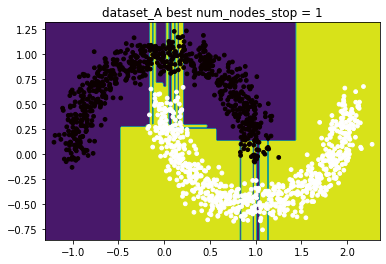

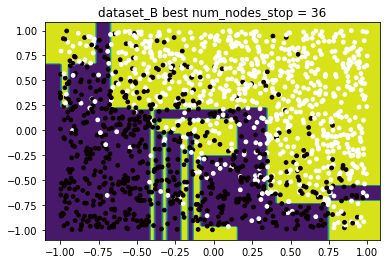

In [13]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

for name in ['A','B']:
    data=np.load('dataset_'+name+'.npz')
    lis=data.files


    train_X=data[lis[0]]
    train_Y=data[lis[1]]

    x_min = min(train_X[:,0])
    x_max = max(train_X[:,0])
    y_min = min(train_X[:,1])
    y_max = max(train_X[:,1])

    X = np.arange(x_min-.1,x_max+.1,0.02) ##change it to .02/.01 while submitting
    Y = np.arange(y_min-.1,y_max+.1,0.02)
    X_inst,Y_inst = np.meshgrid(X,Y)

    x1 = X_inst.reshape((-1,1))
    x2 = Y_inst.reshape((-1,1))
    D_inst  = np.concatenate((x1,x2),axis=1)
    
    if name=='A':
        num_nodes_stop=1
    if name=='B':
        num_nodes_stop=36
    
    tree=[]
    tree = train_decision_tree(train_X, train_Y, 0, num_nodes_stop, criterion='accuracy')
    
    pred_train_Y = eval_decision_tree(tree, train_X)
    z = eval_decision_tree(tree, D_inst)
    plt.figure()
    
    Z_inst = z.reshape(X_inst.shape)
    plt.contourf(X_inst,Y_inst,Z_inst)
    plt.scatter(train_X[:,0], train_X[:,1],c=train_Y,cmap='hot',s=14)
    plt.title('dataset_'+name+' best num_nodes_stop = '+str(num_nodes_stop))
    plt.show()

# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [14]:
# CodeWrite cell
# Write Random Forest classifier. 

def train_each_decision_tree(X, Y, index, feat, num_nodes_stop=1, criterion='accuracy' ):
    """ Returns a decision tree trained on X and Y. 
Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
Split criterion can be either 'accuracy' or 'entropy'.
Returns a tree (In whatever format that you find appropriate)
    """    
    #cd
    global tree
    if len(X)<=num_nodes_stop:
        if np.sum(Y)>=0:
            tree = tree+[tuple((index, 0, 0, 1))]
        else:
            tree = tree+[tuple((index, 0, 0, -1))]
        return
    if np.all(Y==1) or np.all(Y==-1):
        tree = tree+[tuple((index, 0, 0, Y[0]))]
        return
    
    
    
    i=-1
    acc_att = np.zeros(len(feat))
    best_thr_holds = np.zeros(len(feat))
            
    for att in feat:
        i+=1
                                           
        
        
        thr = np.unique(X[:,att])
        thr_holds = []
        
        if len(thr)==1:
            if criterion=='entropy':
                acc_att[i]= -float('inf')
            continue
        else:
            for p in np.arange(0,len(thr)):
                if p+1<len(thr):
                    thr_holds.append((thr[p]+thr[p+1])/2)
        thr_holds = np.array(thr_holds)
        acc_thr = np.zeros(len(thr_holds))
        
        if criterion=='accuracy':
            j=-1
            for thr_hold in thr_holds:
                j+=1
                pred_Y = np.ones(len(Y))
                pred_Y[X[:,i]<thr_hold]=-1
                acc_thr[j] = np.sum(pred_Y==Y)/len(Y)
                if acc_thr[j]<0.5:
                    acc_thr[j]=1-acc_thr[j]
        elif criterion=='entropy':
            j=-1
            for thr_hold in thr_holds:
                j+=1
                left_Y = Y[X[:,i]<thr_hold]
                right_Y = Y[X[:,i]>thr_hold]
                left_n = len(left_Y)
                right_n = len(right_Y)
                
                
                left_pos = np.sum(left_Y==1)
                left_neg = left_n - left_pos
                right_pos = np.sum(right_Y==1)
                right_neg = right_n - right_pos
                
                if left_pos==0 or left_neg==0:
                    left_ent=0
                else:
                    left_ent = -(left_pos/left_n)*np.log2(left_pos/left_n)-(left_neg/left_n)*np.log2(left_neg/left_n)
                if right_pos==0 or right_neg==0:
                    right_ent=0
                else:
                    right_ent = -(right_pos/right_n)*np.log2(right_pos/right_n)-(right_neg/right_n)*np.log2(right_neg/right_n)
                avg_ent = left_n*left_ent+right_n*right_ent
                acc_thr[j] = -avg_ent
        best_thr_holds[i] = thr_holds[acc_thr==np.max(acc_thr)][0]
        acc_att[i] = np.max(acc_thr)
    att = feat[np.argmax(acc_att)]   
    thr_hold = best_thr_holds[np.argmax(acc_att)]
    tree = tree+[tuple((index, att, thr_hold,0))]
    
    
    
    
    left_part, right_part = (train_each_decision_tree(X[X[:,att]<thr_hold], Y[X[:,att]<thr_hold], 2*index+1, 
                                                  feat, num_nodes_stop, criterion ),
                              train_each_decision_tree(X[X[:,att]>thr_hold], Y[X[:,att]>thr_hold], 2*index+2, 
                                                  feat, num_nodes_stop, criterion))
    
    #right_part = train_decision_tree(X[X[:,att]>thr_hold], Y[X[:,att]>thr_hold], 2*index+2, num_nodes_stop, criterion='accuracy')
    
    return [tree]


##############################
def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1, criterion='accuracy', a=0.5, b=0.5):
    
    rand_forest = []
    for i in range(num_trees):
        n = len(X)
        inds = np.arange(n)
        np.random.shuffle(inds)
        
        n_sample = int(a*n)
        inds_sample = inds[:n_sample]
        
        train_X = X[inds_sample]
        train_Y = Y[inds_sample]
        
        
        m = X.shape[1]
        m_sample = int(0.5*m)
        
        feats = np.arange(m)
        np.random.shuffle(feats)
        
        feat_sample =feats[:m_sample]
        
        global tree
        tree = []
        tree = train_each_decision_tree(train_X, train_Y, 0, feat_sample, 
                                   num_nodes_stop=1, criterion=criterion )
        rand_forest = rand_forest+ tree
    return rand_forest    
        

    
##########################    
def eval_each_decision_tree(tree, test_X):
    m = len(test_X)
    pred_test_Y=np.zeros(m)
    
    for i in range(m):
        t = test_X[i]
        
        index = 0
        
        j=0
        while j<len(tree):
            
            if index==tree[j][0]: 
                if tree[j][3]!=0:
                    pred_test_Y[i]=tree[j][3]
                else:
                    att = tree[j][1]
                    thr_hold = tree[j][2]
                    if t[att]<thr_hold:
                        index = 2*index+1
                    else:
                        index = 2*index+2
            j+=1
    
    return pred_test_Y

def eval_random_forest(random_forest, test_X):
    
    Y_pred=np.zeros(len(test_X))
    for i in range(len(random_forest)):
        Y_pred+=eval_each_decision_tree(random_forest[i],test_X)
    Y_pred=Y_pred/len(random_forest)
    
    Y_pred = np.sign(Y_pred)
    Y_pred[Y_pred==0]=1
    return Y_pred



In [15]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.
for name in ['A','B','C','D']:
    #getting data from npz file
    data=np.load('dataset_'+name+'.npz')
    lis=data.files
    X=data[lis[0]]
    Y=data[lis[1]]
    test_X = data[lis[2]]
    test_Y = data[lis[3]]

    till=int(.7*len(X))
    train_X=X[:till]
    train_Y=Y[:till]
    valid_X=X[till:]
    valid_Y=Y[till:]
    
    
    num_opt = np.array([2,4,10,18,28,40,60,100,160,200]) 
    
    acc = np.zeros(len(num_opt))
    for criterion in ['accuracy','entropy']:
        i=-1
        for num_trees in num_opt:
            i+=1
            
            rand_forest = train_random_forest(train_X, train_Y,num_trees, 
                                              num_nodes_stop=1, criterion=criterion, a=0.5, b=0.5)
            pred_valid_Y = eval_random_forest(rand_forest, valid_X)
            acc[i] = np.sum(pred_valid_Y==valid_Y)

        acc_max = np.max(acc)
        best_num_trees = num_opt[np.argwhere(acc==acc_max)][0][0]
        
        ##training and test error
        
        rand_forest = train_random_forest(X, Y, best_num_trees, 
                                              num_nodes_stop=1, criterion=criterion, a=0.5, b=0.5)
            
        pred_train_Y = eval_random_forest(rand_forest, X)
        train_err = 100 - np.sum(pred_train_Y==Y)/len(Y)*100

        pred_test_Y = eval_random_forest(rand_forest, test_X)
        test_err = 100 - np.sum(pred_test_Y==test_Y)/len(test_Y)*100

        


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic). <br> <br>
<b>dataset_A</b><br>
-taking 160 trees will surely overfits the training data but still it gives large test error than a single decision tree found in last problem.  

| criterion |   best  num_trees | train error    (in %) | test error    (in %) |
|-----------|-------------------|-----------------------|----------------------|
| accuracy  | 160               | 0.067                 | 13.2                 |
| entropy   | 100               | 0.0                   | 10.6                 |

<b>dataset_B</b>

| criterion |   best  num_trees | train error    (in %) | test error    (in %) |
|-----------|-------------------|-----------------------|----------------------|
| accuracy  | 160               | 0.133                 | 31.8                 |
| entropy   | 100               | 0.4                   | 31.8                 |

<b>dataset_C</b><br>
-for dataset_C and D which contains more no. of features, random forest performs better than a single decision tree

| criterion |   best  num_trees | train error    (in %) | test error    (in %) |
|-----------|-------------------|-----------------------|----------------------|
| accuracy  | 160               | 0.0                   | 5.051                |
| entropy   | 200               | 0.0                   | 4.714                |

<b>dataset_D</b>

| criterion |   best  num_trees | train error    (in %) | test error    (in %) |
|-----------|-------------------|-----------------------|----------------------|
| accuracy  | 18                | 0.25                  | 2.959                |
| entropy   | 18                | 0.5                   | 6.509                |

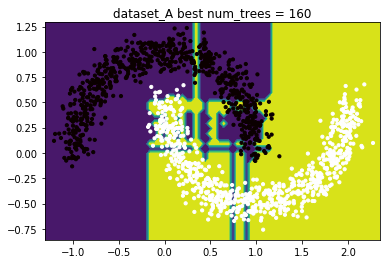

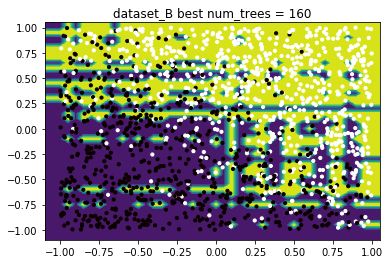

In [16]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

for name in ['A','B']:
    data=np.load('dataset_'+name+'.npz')
    lis=data.files


    train_X=data[lis[0]]
    train_Y=data[lis[1]]
    
    x_min = min(train_X[:,0])
    x_max = max(train_X[:,0])
    y_min = min(train_X[:,1])
    y_max = max(train_X[:,1])

    X = np.arange(x_min-.1,x_max+.1,0.05) ##change it to .02/.01 while submitting
    Y = np.arange(y_min-.1,y_max+.1,0.05)
    X_inst,Y_inst = np.meshgrid(X,Y)

    x1 = X_inst.reshape((-1,1))
    x2 = Y_inst.reshape((-1,1))
    D_inst  = np.concatenate((x1,x2),axis=1)
    
    if name=='A':
        num_trees=160
    if name=='B':
        num_trees=160
    
    rand_forest = train_random_forest(train_X, train_Y,num_trees, 
                                              num_nodes_stop=1, criterion='accuracy', a=0.5, b=0.5)
    z = eval_random_forest(rand_forest, D_inst)
    plt.figure()
    
    Z_inst = z.reshape(X_inst.shape)
    plt.contourf(X_inst,Y_inst,Z_inst)
    
    
    plt.scatter(train_X[:,0], train_X[:,1],c=train_Y,cmap='hot',s=10)
    plt.title('dataset_'+name+' best num_trees = '+str(num_trees))
    plt.show()